In [14]:
# --- Бібліотеки для даної роботи ---
try:
    import numpy, pandas, scipy, matplotlib, jinja2
    print("Бібліотеки вже встановлені. Пропускаємо інсталяцію.")
except ImportError:
    print("Встановлюємо бібліотеки...")
    %pip install numpy pandas scipy matplotlib jinja2

Бібліотеки вже встановлені. Пропускаємо інсталяцію.


## Задача 4. Аналіз функції двох змінних

**Умова:**

Дано функцію двох змінних:
$$f(x, y) = 0.5x^2 + 0.3y^2 + 0.2xy + 10x + 5y$$

**Виконайте наступні завдання:**

1.  **Знайдіть частинні похідні аналітично.** Обчисліть $\frac{\partial f}{\partial x}$ та $\frac{\partial f}{\partial y}$.
2.  **Обчисліть градієнт чисельно.** Використовуючи функцію `approx_fprime` з бібліотеки `scipy.optimize`, обчисліть градієнт $\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$ у точці $(x, y) = (10, 20)$.
3.  **Порівняйте результати.** Обчисліть значення частинних похідних за аналітичними формулами з пункту 1 для точки $(10, 20)$. Порівняйте з чисельними значеннями з пункту 2.
4.  **Оцініть зміну функції.** Використовуючи формулу лінійної апроксимації для функції двох змінних:
    $$\Delta f \approx \frac{\partial f}{\partial x} \cdot \Delta x + \frac{\partial f}{\partial y} \cdot \Delta y$$
    обчисліть наближену зміну значення функції $\Delta f$ у точці $(10, 20)$, якщо $x$ збільшити на $0.5$, а $y$ зменшити на $0.3$. Порівняйте з точною зміною $f(10.5, 19.7) - f(10, 20)$.

Красивий Вивід:
------------------------------------------------------------
ПОРІВНЯННЯ ГРАДІЄНТІВ


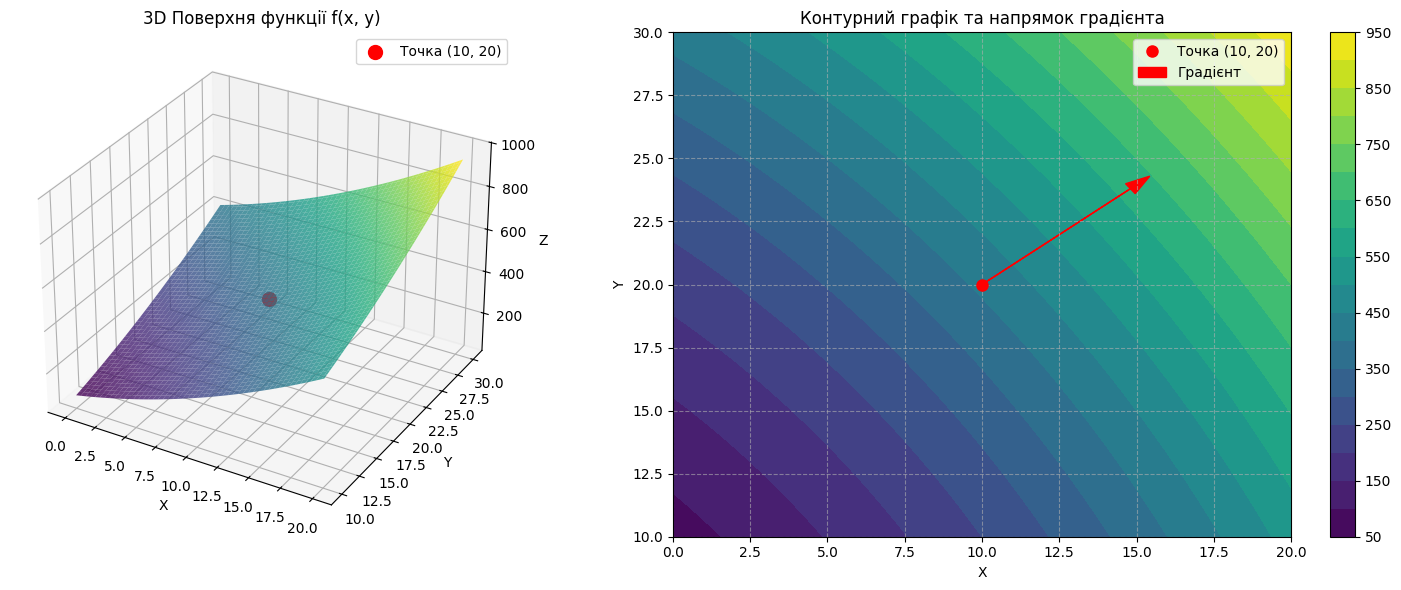

Компонента,Аналітично,Чисельно (approx_fprime),Похибка
df/dx,24.000000,24.000000,0.000000
df/dy,19.000000,19.000000,0.000000



------------------------------------------------------------
ОЦІНКА ЗМІНИ ФУНКЦІЇ (dx=0.5, dy=-0.3)
Початкова точка: f(10.0, 20.0) = 410.0
Нова точка:      f(10.5, 19.7) = 416.422
------------------------------------------------------------


Метод,Зміна f,Різниця
Лінійна апроксимація,6.300000,0.122000
Точний розрахунок,6.422000,0.122000



Технічний вивід:
{'градієнт_аналітично': [np.float64(24.0), np.float64(19.0)], 'градієнт_чисельно': [np.float64(24.000000468958206), np.float64(19.000000273558953)], 'дельта_f_наближено': 6.3, 'дельта_f_точно': 6.4220000000000255, 'абсолютна_похибка': 0.12200000000002564}


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import approx_fprime
from IPython.display import display

def func(var):
    x, y = var
    return 0.5*x**2 + 0.3*y**2 + 0.2*x*y + 10*x + 5*y

x0, y0 = 10.0, 20.0
point = np.array([x0, y0])
epsilon = 1e-6

dx = 0.5
dy = -0.3

df_dx_ana = 1.0 * x0 + 0.2 * y0 + 10
df_dy_ana = 0.6 * y0 + 0.2 * x0 + 5
grad_analytical = np.array([df_dx_ana, df_dy_ana])

grad_numerical = approx_fprime(point, func, epsilon)

delta_f_approx = df_dx_ana * dx + df_dy_ana * dy

f_start = func([x0, y0])
f_end = func([x0 + dx, y0 + dy])
delta_f_exact = f_end - f_start

df_comparison = pd.DataFrame({
    'Компонента': ['df/dx', 'df/dy'],
    'Аналітично': grad_analytical,
    'Чисельно (approx_fprime)': grad_numerical,
    'Похибка': np.abs(grad_analytical - grad_numerical)
})

df_approx = pd.DataFrame([{
    'Метод': 'Лінійна апроксимація',
    'Зміна f': delta_f_approx
}, {
    'Метод': 'Точний розрахунок',
    'Зміна f': delta_f_exact
}])
df_approx['Різниця'] = abs(delta_f_approx - delta_f_exact)

print("Красивий Вивід:")
print("-" * 60)
print("ПОРІВНЯННЯ ГРАДІЄНТІВ")

x_range = np.linspace(0, 20, 100)
y_range = np.linspace(10, 30, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = func([X, Y])

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, edgecolor='none')
ax1.scatter(x0, y0, f_start, color='red', s=100, label='Точка (10, 20)')
ax1.set_title('3D Поверхня функції f(x, y)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, Z, levels=20, cmap=cm.viridis)
fig.colorbar(contour, ax=ax2)
ax2.plot(x0, y0, 'ro', markersize=8, label='Точка (10, 20)')

ax2.arrow(x0, y0, grad_analytical[0]*0.2, grad_analytical[1]*0.2, 
          head_width=0.5, head_length=0.8, fc='red', ec='red', label='Градієнт')

ax2.set_title('Контурний графік та напрямок градієнта')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show() 

display(df_comparison.style.hide(axis='index'))

print("\n" + "-" * 60)
print("ОЦІНКА ЗМІНИ ФУНКЦІЇ (dx=0.5, dy=-0.3)")
print(f"Початкова точка: f({x0}, {y0}) = {f_start}")
print(f"Нова точка:      f({x0+dx}, {y0+dy}) = {f_end}")
print("-" * 60)
display(df_approx.style.hide(axis='index'))
print("=" * 60)

print("\nТехнічний вивід:")
print({
    "градієнт_аналітично": list(grad_analytical),
    "градієнт_чисельно": list(grad_numerical),
    "дельта_f_наближено": delta_f_approx,
    "дельта_f_точно": delta_f_exact,
    "абсолютна_похибка": abs(delta_f_approx - delta_f_exact)
})

### Аналітичні обчислення

#### 1. Знаходження частинних похідних

Дано функцію:
$$f(x, y) = 0.5x^2 + 0.3y^2 + 0.2xy + 10x + 5y$$

Знайдемо частинну похідну по $x$ (вважаємо $y$ константою):
$$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x}(0.5x^2) + 0 + \frac{\partial}{\partial x}(0.2xy) + \frac{\partial}{\partial x}(10x) + 0$$
$$\frac{\partial f}{\partial x} = 1.0x + 0.2y + 10$$

Знайдемо частинну похідну по $y$ (вважаємо $x$ константою):
$$\frac{\partial f}{\partial y} = 0 + \frac{\partial}{\partial y}(0.3y^2) + \frac{\partial}{\partial y}(0.2xy) + 0 + \frac{\partial}{\partial y}(5y)$$
$$\frac{\partial f}{\partial y} = 0.6y + 0.2x + 5$$

#### 2. Обчислення градієнта у точці $(10, 20)$

Підставимо $x=10, y=20$:

1.  $\frac{\partial f}{\partial x}(10, 20) = 10 + 0.2(20) + 10 = 10 + 4 + 10 = 24$
2.  $\frac{\partial f}{\partial y}(10, 20) = 0.6(20) + 0.2(10) + 5 = 12 + 2 + 5 = 19$

Отже, градієнт:
$$\nabla f(10, 20) = (24, 19)$$

#### 3. Лінійна апроксимація зміни функції

Дано прирости: $\Delta x = 0.5$, $\Delta y = -0.3$.
Формула повного диференціала (наближена зміна):
$$\Delta f \approx \frac{\partial f}{\partial x} \Delta x + \frac{\partial f}{\partial y} \Delta y$$

Підставляємо значення:
$$\Delta f \approx 24 \cdot (0.5) + 19 \cdot (-0.3)$$
$$\Delta f \approx 12 - 5.7 = 6.3$$

#### 4. Точна зміна функції

Обчислимо $f(10, 20)$:
$$f(10, 20) = 0.5(100) + 0.3(400) + 0.2(200) + 100 + 100 = 50 + 120 + 40 + 200 = 410$$

Обчислимо $f(10.5, 19.7)$:
$$f(10.5, 19.7) = 0.5(10.5)^2 + 0.3(19.7)^2 + 0.2(10.5)(19.7) + 10(10.5) + 5(19.7)$$
$$f(10.5, 19.7) = 55.125 + 116.427 + 41.37 + 105 + 98.5 = 416.422$$

Точна різниця:
$$\Delta f_{\text{exact}} = 416.422 - 410 = 6.422$$

Похибка апроксимації:
$$|6.3 - 6.422| = 0.122$$